# Introduction

Everybody knows something about Titanic. And unfortunately it's accident. Here I try to test, if I would be on that ship with my family, could I stay alive. So could you? Let's find out.

##        Which models used
We used the following models on this notebook:

* Logistic Regression
* KNeighbors Classifier
* SVC (Linear)
* SVC (RBF)
* Naive Bayes
* Decision Tree Classifier
* Random Forest Classifier
* Hist Gradient Boosting Classifier
* Gradient Boosting Classifier
* XGBoost Classifier
* Ligth GBM Classifier

<font color = 'red'>
Content: 

1. [Import Data and Libraries](#1)
2. [Variable Description and Analysis](#2)
    * [Feature Types](#3)
    * [Variable Analysis](#4)
        * [Categorical Variable](#5)
        * [Numerical Variable](#6)
3. [Basic Data Analysis](#7)
4. [Outlier Detection](#8)
5. [Handle Missing Value](#9)
    * [Finding Missing Value](#10)
    * [Filling Missing Value](#11)
6. [Visualization and Feature Engineering](#12)
    * [Parch and SibSp -- Survived](#13)
    * [Pclass -- Survived](#14)
    * [Age -- Survived](#15)
    * [Name -- Title](#16)
    * [Embarked](#17)
    * [Ticket](#18)
    * [Sex](#19)
    * [Drop Passenger ID](#20)

7. [Train Test Split](#21)
8. [Modeling](#22)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#23) 
    * [Ensemble Modeling](#24)
    * [Prediction and Submission](#25)

<a id = "1"></a> 
# Import Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


We are gonna get PassengerId column from test data because when we submit our project, we will need them and their possibility of staying alive.

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "2"></a><br>
# Variable Description


* PassengerId => ID number of passenger
* Survived => After crash, Alive (1) or Dead (0)
* Pclass => 1. Class, 2. Class, 3. Class
* Name => Name of passenger
* Sex => Gender of passenger
* Age => Age of passenger
* SibSp => Number of siblings of passenger in ship
* Parch => Number of children of passenger in ship
* Ticket => Ticket number
* Fare => Price of ticket
* Cabin => Number of Cabin
* Embarked => Name of port ( C = Cherbourg, Q = Queenstown, S = Southampton )

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id = "3"></a><br>
## Feature types
* float64(2) => Fare and Age
* int64(5) => Pclass, sibsp, parch, passengerId and survived
* object(5) => Cabin, embarked, ticket, name and sex

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "4"></a><br>
## Variable Analysis
1. Categorical Variables: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, SibSp and Parch
2. Numerical Variables: Fare, age and passengerId

<a id = "5"></a><br>
### Categorical Variable

In [7]:
def bar_plot(column_name):

    # count number of categorical variable(value/sample)
    number_of_values=train_df[column_name].value_counts()

    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(number_of_values.index,number_of_values)
    plt.xticks(number_of_values.index, number_of_values.index.values)
    plt.ylabel("Frequency")
    plt.title(column_name)
    plt.show()
    print("{}: \n {}".format(column_name,number_of_values))

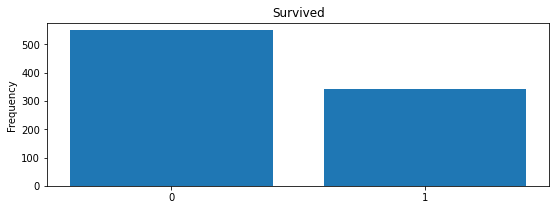

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


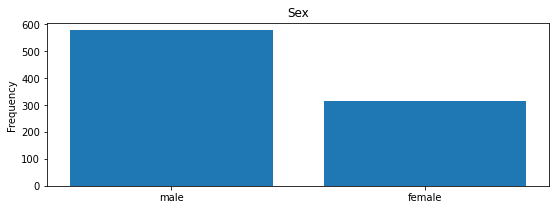

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


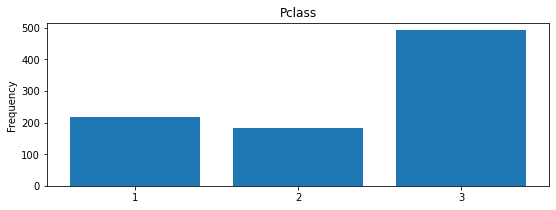

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


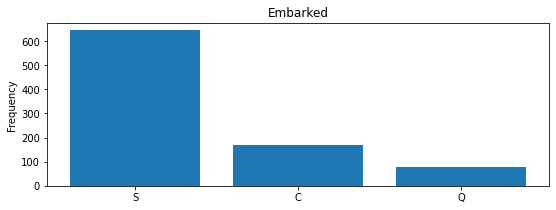

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


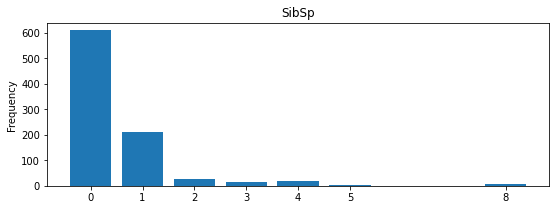

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


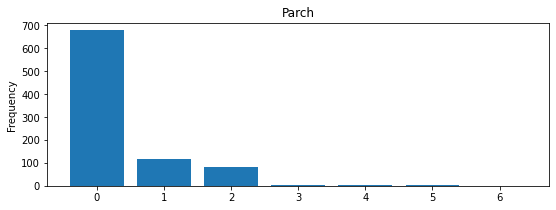

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
cat_variables_sense=["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for i in cat_variables_sense:
    bar_plot(i)

We don't plot some of them ( "Cabin", "Name", "Ticket" ) because won't make any sense.

In [9]:
cat_variables_nonsense = ["Cabin", "Name", "Ticket"]
cat_variables= cat_variables_sense + cat_variables_nonsense

<a id = "6"></a><br>
### Numerical Variable

In [10]:
def hist_plot(column_name):
    
    plt.figure(figsize=(9,3))
    plt.hist(train_df[column_name],bins=50)
    plt.xlabel("column_name")
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(column_name))
    plt.show()

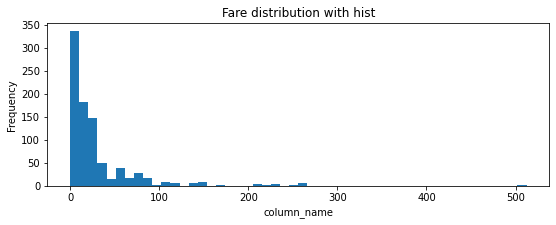

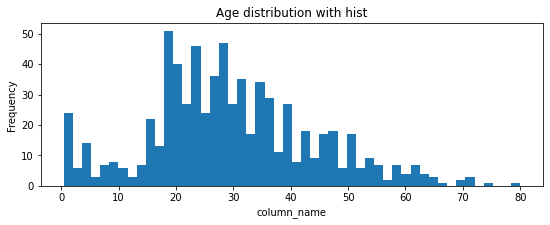

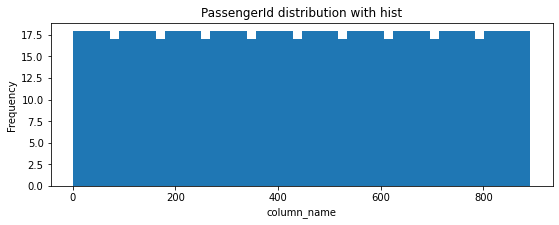

In [11]:
num_variables=["Fare", "Age","PassengerId"]
for i in num_variables:
    hist_plot(i)

<a id = "7"></a><br>
# Basic Data Analysis

Will try to find relation between some features.

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [12]:
train_df[["Pclass","Survived"]].groupby("Pclass").mean().sort_values(by="Survived",ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [13]:
train_df[["Sex","Survived"]].groupby("Sex").mean().sort_values(by="Survived",ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [14]:
train_df[["SibSp","Survived"]].groupby("SibSp").mean().sort_values(by="Survived",ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [15]:
train_df[["Parch","Survived"]].groupby("Parch").mean().sort_values(by="Survived",ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


<a id = "8"></a><br>
# Outlier Detection

Now, we will find the outliers and change them with upper or lower bounds. (IQR Method)

In [16]:
def outlier_detection(df,feature):
    df[feature]=sorted(df[feature])
    Q1, Q3 = np.percentile(df[feature] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    outliers=[]
    for i in df[feature]:
        if (i < lower_range) | (i > upper_range):
            outliers.append(i)
    print(len(outliers)," values detected and fixed of", feature, "feature.")
    df[feature][df.loc[:,feature]<lower_range]=lower_range
    df[feature][df.loc[:,feature]>upper_range]=upper_range
    
    return df[feature]

In [17]:
for col in num_variables:
    train_df[col]= outlier_detection(train_df,col) # Main DF CHANGED
    test_df[col]=outlier_detection(test_df,col) # Main DF CHANGED

116  values detected and fixed of Fare feature.
0  values detected and fixed of Fare feature.
0  values detected and fixed of Age feature.
0  values detected and fixed of Age feature.
0  values detected and fixed of PassengerId feature.
0  values detected and fixed of PassengerId feature.


<a id = "9"></a><br>
# Missing Value

Let's concat both datas before missing imputation.

In [18]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)  # Main DF CHANGED

<a id = "10"></a><br>
## Find Missing Value

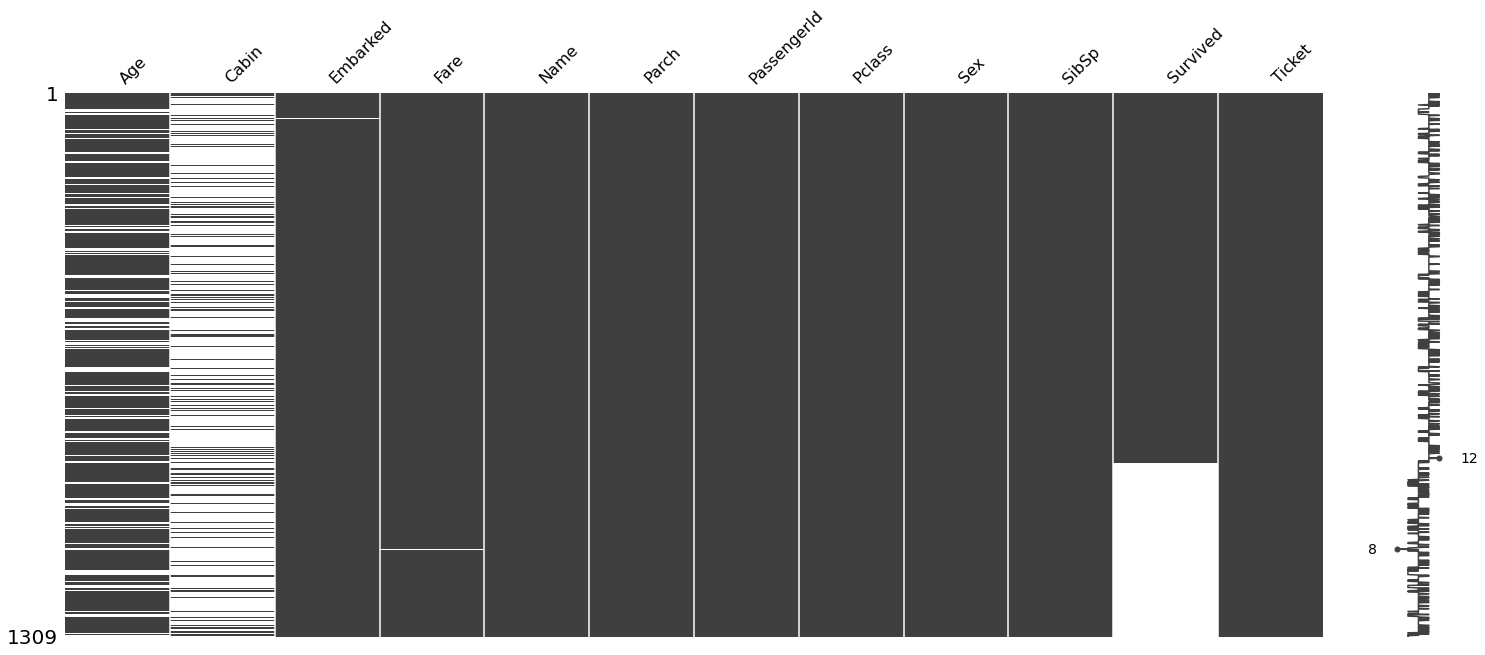

In [19]:
import missingno as msno
msno.matrix(train_df);

In [20]:
train_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

<a id = "11"></a><br>
## Fill Missing Value

Embarked has 2 missing value<br/>
Fare has only 1

In [21]:
import statistics as stats
train_df["Embarked"] = train_df["Embarked"].fillna(stats.mode(train_df["Embarked"])) # Main DF CHANGED
train_df[train_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [22]:
train_df["Fare"] = train_df["Fare"].fillna(stats.mode(train_df["Fare"]))

I chose some features which I think related with Age feature. So let's compare their correlation.

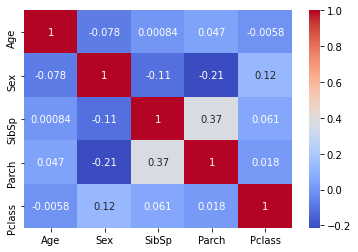

In [23]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]] # Main DF CHANGED
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True, cmap = "coolwarm")
plt.show()

Age is not correlated with sex but it is correlated with Parch, Sibsp and Pclass. <br/>
So let's impute missing values of Age feature according to these 3 features' mean.

In [24]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = (train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"]) & \
                                 (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median())
    
    # sometimes some values can't fill with upper method. so we will impute them with that column's mean
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred # Main DF CHANGED
    else:
        train_df["Age"].iloc[i] = age_med # Main DF CHANGED


In [25]:
train_df[train_df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [26]:
len(train_df.Cabin), train_df.Cabin.isnull().sum()

(1309, 1014)

As we see, %77 of Cabin values are NaN and I think Cabin feature is meaningless as the name of passengers. So I will drop Cabin feature.

In [27]:
train_df.drop(labels = ["Cabin"], axis = 1, inplace = True) # Main DF CHANGED

<a id = "12"></a><br>
# Visualization and Feature Engineering

<a id = "13"></a><br>
## Parch and SibSp-- Survived

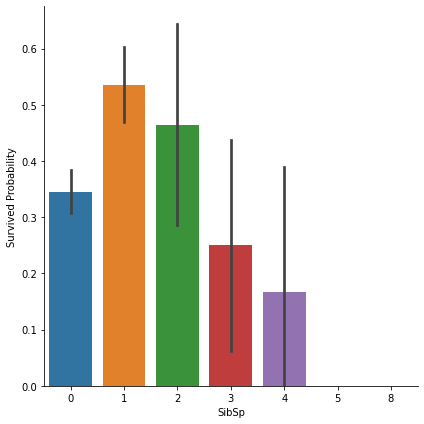

In [28]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

As we see, having less then 3 children increase ratio of survive.

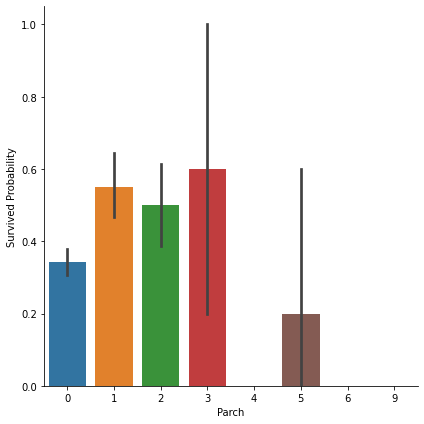

In [29]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

Here also having less children increase ratio of survive. So we can concat these two features as FamilyMembers.

In [30]:
train_df["FamilyMembers"]=train_df["Parch"]+train_df["SibSp"]+1 # Main DF CHANGED
train_df.drop(columns=["Parch","SibSp"], axis=1, inplace=True)
train_df

,Age,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket,FamilyMembers
0,2.0,S,0.0000,"Braund, Mr. Owen Harris",1,3,1,0.0,A/5 21171,2
1,2.0,C,0.0000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,1.0,PC 17599,2
2,3.0,S,0.0000,"Heikkinen, Miss. Laina",3,3,0,1.0,STON/O2. 3101282,1
3,4.0,S,0.0000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,0,1.0,113803,2
4,7.0,S,0.0000,"Allen, Mr. William Henry",5,3,1,0.0,373450,1
...,...,...,...,...,...,...,...,...,...,...
1304,29.0,S,227.5250,"Spector, Mr. Woolf",1305,3,1,NaN,A.5. 3236,1
1305,26.5,C,247.5208,"Oliva y Ocana, Dona. Fermina",1306,1,0,NaN,PC 17758,1
1306,29.0,S,262.3750,"Saether, Mr. Simon Sivertsen",1307,3,1,NaN,SOTON/O.Q. 3101262,1
1307,29.0,S,263.0000,"Ware, Mr. Frederick",1308,3,1,NaN,359309,1


Let's check relation between FamilySize and Survived features.

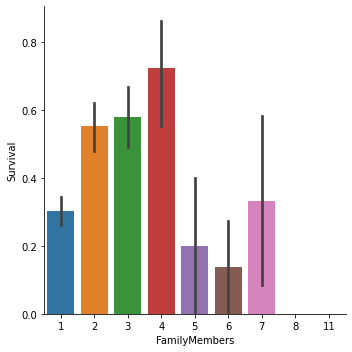

In [31]:
g = sns.factorplot(x = "FamilyMembers", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

As we see after 4 member, the survival ratio is decrease. So let's take a threshold ( for this example, I will take 4.5 ) and categorize them lower than 4.5 and upper than 4.5.

In [32]:
train_df["FamilyMembers"]=[1 if i < 4.5 else 0 for i in train_df["FamilyMembers"]] # Main DF CHANGED
train_df["FamilyMembers"].head()

0    1
1    1
2    1
3    1
4    1
Name: FamilyMembers, dtype: int64

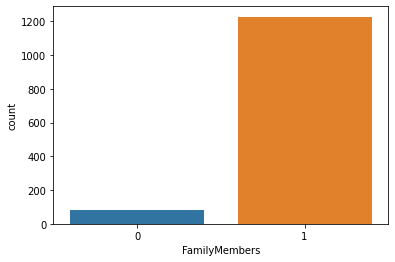

In [33]:
sns.countplot(x = "FamilyMembers", data = train_df)
plt.show()

<a id = "14"></a><br>
## Pclass -- Survived

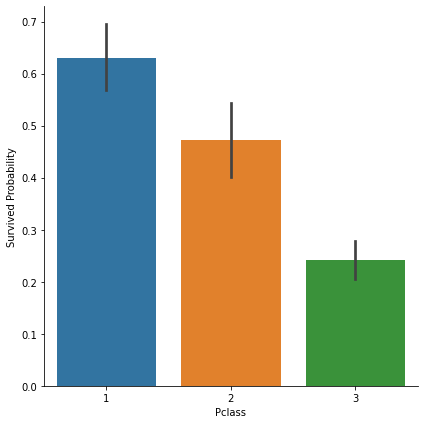

In [34]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

Pclass feature is actually categorical but it's type int64. So let's convert it to category then implement one-hot encoding.

In [35]:
train_df.Pclass.dtypes

dtype('int64')

In [36]:
train_df["Pclass"] = train_df["Pclass"].astype("category") 
train_df = pd.get_dummies(train_df, columns= ["Pclass"]) # Main DF CHANGED
train_df.head()

,Age,Embarked,Fare,Name,PassengerId,Sex,Survived,Ticket,FamilyMembers,Pclass_1,Pclass_2,Pclass_3
0,2.0,S,0.0,"Braund, Mr. Owen Harris",1,1,0.0,A/5 21171,1,0,0,1
1,2.0,C,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,0,1.0,PC 17599,1,1,0,0
2,3.0,S,0.0,"Heikkinen, Miss. Laina",3,0,1.0,STON/O2. 3101282,1,0,0,1
3,4.0,S,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,0,1.0,113803,1,1,0,0
4,7.0,S,0.0,"Allen, Mr. William Henry",5,1,0.0,373450,1,0,0,1


<a id = "15"></a><br>
## Age -- Survived

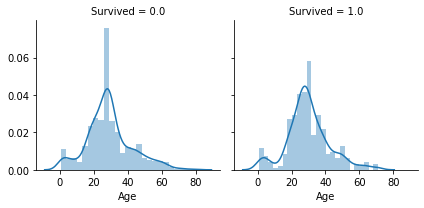

In [37]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

We see here that around 30 age people couldn't survive mostly. Most passengers are between 15-40 age range.

<a id = "16"></a><br>
## Name -- Title

We can't predict the person could stay alive or not because of their name but we can predict by their title. So now we are gonna get every name's title instead of name.

In [38]:
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in train_df["Name"]] # Main DF CHANGED

In [39]:
train_df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

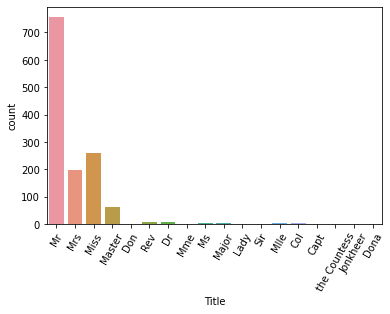

In [40]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [41]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other") # Main DF CHANGED
train_df["Title"] = ( [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or \
                       i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]] )  # Main DF CHANGED
train_df["Title"].head()

0    2
1    1
2    1
3    1
4    2
Name: Title, dtype: int64

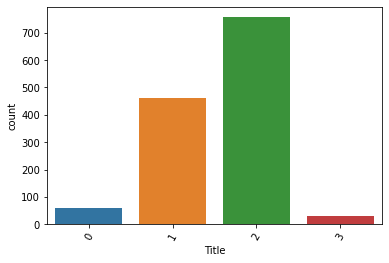

In [42]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

Now we will drop the Name feature.

In [43]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True) # Main DF CHANGED

In [44]:
train_df = pd.get_dummies(train_df,columns=["Title"]) # Main DF CHANGED
train_df.head()

,Age,Embarked,Fare,PassengerId,Sex,Survived,Ticket,FamilyMembers,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3
0,2.0,S,0.0,1,1,0.0,A/5 21171,1,0,0,1,0,0,1,0
1,2.0,C,0.0,2,0,1.0,PC 17599,1,1,0,0,0,1,0,0
2,3.0,S,0.0,3,0,1.0,STON/O2. 3101282,1,0,0,1,0,1,0,0
3,4.0,S,0.0,4,0,1.0,113803,1,1,0,0,0,1,0,0
4,7.0,S,0.0,5,1,0.0,373450,1,0,0,1,0,0,1,0


<a id = "17"></a><br>
## Embarked

One-hot encoding for Embarked feature.

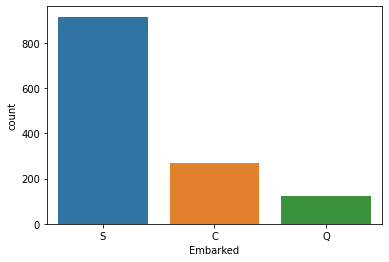

In [45]:
sns.countplot(x = "Embarked", data = train_df);

In [46]:
train_df=pd.get_dummies(train_df, columns=["Embarked"]) # Main DF CHANGED
train_df

,Age,Fare,PassengerId,Sex,Survived,Ticket,FamilyMembers,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3,Embarked_C,Embarked_Q,Embarked_S
0,2.0,0.0000,1,1,0.0,A/5 21171,1,0,0,1,0,0,1,0,0,0,1
1,2.0,0.0000,2,0,1.0,PC 17599,1,1,0,0,0,1,0,0,1,0,0
2,3.0,0.0000,3,0,1.0,STON/O2. 3101282,1,0,0,1,0,1,0,0,0,0,1
3,4.0,0.0000,4,0,1.0,113803,1,1,0,0,0,1,0,0,0,0,1
4,7.0,0.0000,5,1,0.0,373450,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.0,227.5250,1305,1,NaN,A.5. 3236,1,0,0,1,0,0,1,0,0,0,1
1305,26.5,247.5208,1306,0,NaN,PC 17758,1,1,0,0,0,0,0,1,1,0,0
1306,29.0,262.3750,1307,1,NaN,SOTON/O.Q. 3101262,1,0,0,1,0,0,1,0,0,0,1
1307,29.0,263.0000,1308,1,NaN,359309,1,0,0,1,0,0,1,0,0,0,1


<a id = "18"></a><br>
## Ticket

In [47]:
train_df.Ticket.head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

There is many different unique values. At the first part of ticket feature, there are some string and then some digits. So let's take their only string part. Because digit part probably unique values and meaningles as name feature.

Now we will replace "." and "/" characters with "". Then will delete their spaces and split and take first value of list. If there is only digit value, we will call them as "X". 

In [48]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("X")
train_df["Ticket"] = tickets # Main DF CHANGED
train_df["Ticket"].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

Now we will implement binary encoding to them. Because this feature has more than 5 unique values.

In [49]:
from category_encoders import BinaryEncoder
encoder=BinaryEncoder(cols=["Ticket"])
train_df=encoder.fit_transform(train_df) # Main DF CHANGED
train_df

,Age,Fare,PassengerId,Sex,Survived,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,...,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3,Embarked_C,Embarked_Q,Embarked_S
0,2.0,0.0000,1,1,0.0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,2.0,0.0000,2,0,1.0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,3.0,0.0000,3,0,1.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,4.0,0.0000,4,0,1.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,7.0,0.0000,5,1,0.0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.0,227.5250,1305,1,NaN,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1305,26.5,247.5208,1306,0,NaN,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1306,29.0,262.3750,1307,1,NaN,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
1307,29.0,263.0000,1308,1,NaN,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1


<a id = "19"></a><br>
## Sex

Implementing one-hot encoding to Sex feature either.

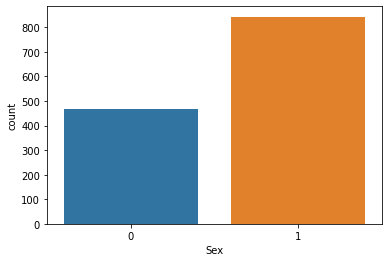

In [50]:
sns.countplot(x="Sex", data=train_df);

In [51]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"]) # Main DF CHANGED
train_df.head()

,Age,Fare,PassengerId,Survived,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,...,Pclass_3,Title_0,Title_1,Title_2,Title_3,Embarked_C,Embarked_Q,Embarked_S,Sex_0,Sex_1
0,2.0,0.0,1,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,2.0,0.0,2,1.0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2,3.0,0.0,3,1.0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,4.0,0.0,4,1.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,7.0,0.0,5,0.0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1


<a id = "20"></a><br>
## Drop PassengerID

I will drop Passenger ID feature because it doesn't make any sense to person's life.

In [52]:
train_df.drop(labels = ["PassengerId"], axis = 1, inplace = True) # Main DF CHANGED

<a id = "21"></a><br>
# Train - Test Split

In [53]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True) # Main DF CHANGED

In [54]:
from sklearn.model_selection import train_test_split
train = train_df[:train_df_len] # Main DF CHANGED
X_train = train.drop(labels = "Survived", axis = 1) # Main DF CHANGED
y_train = train["Survived"] # Main DF CHANGED
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42) # Main DF CHANGED

print( "X_train", len(X_train), "\nX_test", len(X_test), "\ny_train", len(y_train), "\ny_test", len(y_test), "\ntest", len(test) )

X_train 596 
X_test 295 
y_train 596 
y_test 295 
test 418


<a id = "22"></a><br>
# Modeling

Here I have a function to get 11 different models' score.

In [55]:
def models(X_train,Y_train):
    
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=42)
    log.fit(X_train,Y_train)
    
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    
    #use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=42,probability=True)
    svc_lin.fit(X_train,Y_train)
    
    #use SVC (RBF kernel)
    svc_rbf=SVC(kernel="rbf",random_state=42,probability=True)
    svc_rbf.fit(X_train,Y_train)
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion="entropy",random_state=42)
    tree.fit(X_train,Y_train)
    
    #use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=42)
    forest.fit(X_train,Y_train)
    
    # use Hist Gradient Boosting Classifier
    from sklearn.experimental import enable_hist_gradient_boosting
    from sklearn.ensemble import HistGradientBoostingClassifier
    histgrad=HistGradientBoostingClassifier()
    histgrad.fit(X_train,y_train)
    
    # use GBM
    from sklearn.ensemble import GradientBoostingClassifier
    gbm=GradientBoostingClassifier()
    gbm.fit(X_train,y_train)
    
    # use XGBoost
    #!pip install xgboost
    from xgboost import XGBClassifier
    xgboost=XGBClassifier()
    xgboost.fit(X_train,y_train)
    
    # use LightGBM
    #!conda install -c conda-forge lightgbm
    from lightgbm import LGBMClassifier
    lightgbm=LGBMClassifier()
    lightgbm.fit(X_train,y_train)

    #print the training scores for each model
    print('[0] Logistic Regression Training Score:',log.score(X_train,Y_train))
    print('\n[1] K Neighbors Training Score:',knn.score(X_train,Y_train))
    print('\n[2] SVC Linear Training Score:',svc_lin.score(X_train,Y_train))
    print('\n[3] SVC RBF Training Score:',svc_rbf.score(X_train,Y_train))
    print('\n[4] Gaussian Training Score:',gauss.score(X_train,Y_train))
    print('\n[5] Decision Tree Training Score:',tree.score(X_train,Y_train))
    print('\n[6] Random Forest Training Score:',forest.score(X_train,Y_train))
    print('\n[7] Hist Gradient Boosting Training Score:',histgrad.score(X_train,Y_train))
    print('\n[8] Gradient Boosting Training Score:',gbm.score(X_train,Y_train))
    print('\n[9] XGBoost Training Score:',xgboost.score(X_train,Y_train))
    print('\n[10] Light GBM Training Score:',lightgbm.score(X_train,Y_train))
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost,lightgbm

In [56]:
log,knn,svc_lin,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost,lightgbm=models(X_train,y_train)

[0] Logistic Regression Training Score: 0.8271812080536913

[1] K Neighbors Training Score: 0.7651006711409396

[2] SVC Linear Training Score: 0.8221476510067114

[3] SVC RBF Training Score: 0.62751677852349

[4] Gaussian Training Score: 0.8137583892617449

[5] Decision Tree Training Score: 0.9916107382550335

[6] Random Forest Training Score: 0.9731543624161074

[7] Hist Gradient Boosting Training Score: 0.9546979865771812

[8] Gradient Boosting Training Score: 0.9043624161073825

[9] XGBoost Training Score: 0.988255033557047

[10] Light GBM Training Score: 0.9530201342281879


Now I will visualize all accuracy and roc auc score with histogram graph.

In [57]:
models=[log,knn,svc_lin,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost,lightgbm]
models_name=["log","knn","svc_lin","svc_rbf","gauss","tree","forest","histgrad","gbm","xgboost","lightgbm"]

In [58]:
before_tune_accuracy_score={}
def accuracy_score_calculator(model,model_name):
    from sklearn.metrics import accuracy_score
    y_pred=model.predict(X_test)
    before_tune_accuracy_score[model_name]=accuracy_score(y_test,y_pred)

In [59]:
before_tune_roc_score={}
def roc_score_calculator(model,model_name):
    from sklearn.metrics import roc_auc_score
    y_pred=model.predict_proba(X_test)[:,1]
    before_tune_roc_score[model_name]=roc_auc_score(y_test,y_pred)

In [60]:
for i in range(len(models)):
    roc_score_calculator(models[i],models_name[i])
    accuracy_score_calculator(models[i],models_name[i])

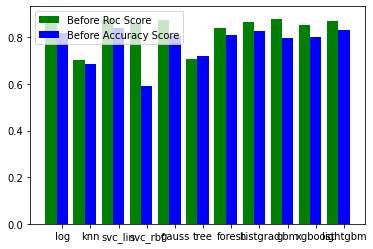

In [61]:
size=np.arange(len(models))
plt.bar(size-0.2, before_tune_roc_score.values(), color='g', width=0.4, tick_label=models_name)
plt.bar(size+0.2, before_tune_accuracy_score.values(),color='b', width=0.4, tick_label=models_name)
plt.legend(["Before Roc Score", "Before Accuracy Score"]);

Here we will see all roc auc scores in a roc_curve graph.

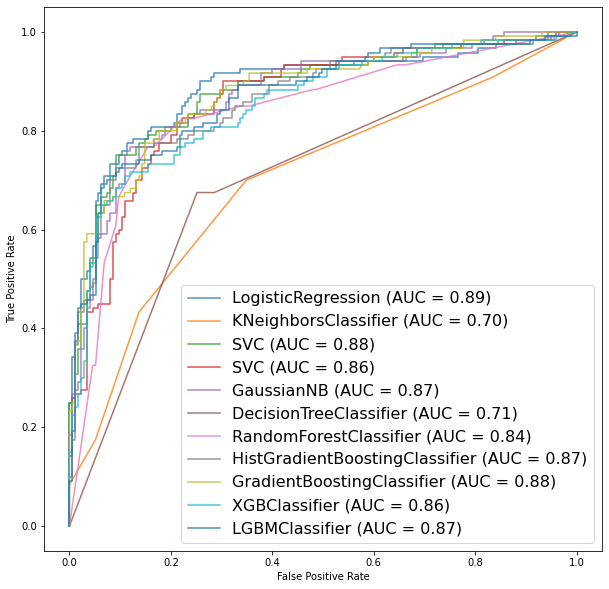

In [62]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,10))
ax = plt.gca()
log_disp = plot_roc_curve(log, X_test, y_test, ax=ax, alpha=0.8)
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
svc_lin_disp = plot_roc_curve(svc_lin, X_test, y_test, ax=ax, alpha=0.8)
svc_rbf_disp = plot_roc_curve(svc_rbf, X_test, y_test, ax=ax, alpha=0.8)
gauss_disp = plot_roc_curve(gauss, X_test, y_test, ax=ax, alpha=0.8)
tree_disp = plot_roc_curve(tree, X_test, y_test, ax=ax, alpha=0.8)
forest_disp = plot_roc_curve(forest, X_test, y_test, ax=ax, alpha=0.8)
histgrad_disp = plot_roc_curve(histgrad, X_test, y_test, ax=ax, alpha=0.8)
gbm_disp = plot_roc_curve(gbm, X_test, y_test, ax=ax, alpha=0.8)
xgboost_disp = plot_roc_curve(xgboost, X_test, y_test, ax=ax, alpha=0.8)
lightgbm_disp = plot_roc_curve(lightgbm, X_test, y_test, ax=ax, alpha=0.8)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

Here we found Logistic Regression, SVC Linear and GBM models best fits for our data. So let's tune them with ensemble learning way.

<a id = "23"></a><br>
## Hyperparameter Tuning -- Grid Search -- Cross Validation

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

classifier = [ SVC(random_state = 42) , LogisticRegression(random_state = 42), 
              GradientBoostingClassifier(random_state = 42) ]

gbm_param_grid = { "loss":["deviance"], "learning_rate": [0.01, 0.05, 0.1, 0.2], 
                  "min_samples_split": np.linspace(0.1, 0.5, 12), "min_samples_leaf": np.linspace(0.1, 0.5, 12), 
                  "max_depth":[3,5,8], "subsample":[0.5, 0.8, 0.9, 1.0], "n_estimators":[10] }

svc_param_grid = {"kernel" : ["linear"], "probability":[True], "gamma": [0.001, 0.01, 0.1, 1] }

logreg_param_grid = {"C":np.logspace(-3,3,7), "penalty": ["l1","l2"], "solver": ['liblinear'] }

classifier_param = [svc_param_grid, logreg_param_grid, gbm_param_grid ]

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1, verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.6min finished


0.822231638418079
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8187853107344631
Fitting 10 folds for each of 6912 candidates, totalling 69120 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 9800 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 14200 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 19400 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 25400 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 32200 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 39800 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 48200 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 57400 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 67400 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 69120 out of 69120 | elapsed:  7.1min finished


0.8137570621468926


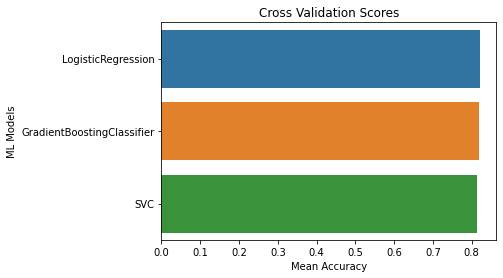

In [65]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, 
                           "ML Models":["LogisticRegression", "GradientBoostingClassifier", "SVC"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores");

<a id = "24"></a><br>
## Ensemble Modeling

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[1]),
                                        ("lr",best_estimators[2])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
accuracy_score(votingC.predict(X_test),y_test)

0.847457627118644

<a id = "25"></a><br>
## Prediction and Submission

Here we will get csv file to make submission after commit.

In [67]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)